In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

len(x_train)

11493376/11490434 [==============================] - 0s 0us/step


60000

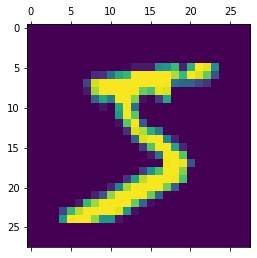

In [ ]:
len(x_test)
plt.matshow(x_train[0])



In [ ]:
y_train[0]

x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened.shape


(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7222 - accuracy: 0.8152
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3077 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2894 - accuracy: 0.9177
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2771 - accuracy: 0.9215
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2605 - accuracy: 0.9265


In [ ]:

model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1000us/step - loss: 0.2660 - accuracy: 0.9257


[0.26600411534309387, 0.9257000088691711]

Text(69.0, 0.5, 'Truth')

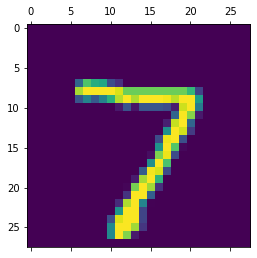

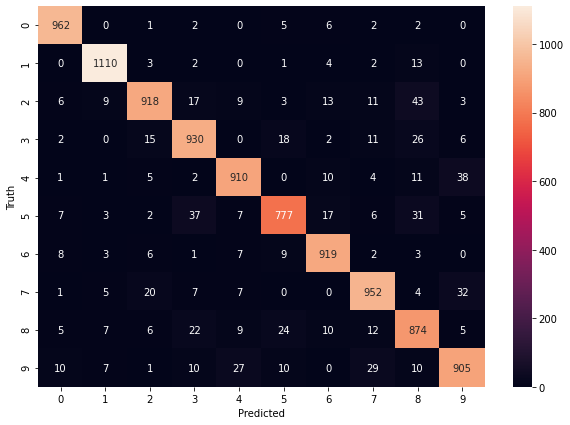

In [ ]:
y_pred=model.predict(x_test_flattened)
i=np.argmax(y_pred[0])
plt.matshow(x_test[0])
y_pred_labels=[np.argmax(i) for i in y_pred];
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)


import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')